In [3]:
Ha Duong - A

SyntaxError: invalid syntax (1627714528.py, line 1)

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [2]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('titanic.csv')

df.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [4]:
'''your code here'''
total_passengers = len(df)
percentage_male = (df['Sex'].sum() / total_passengers) * 100
percentage_survived = (df['Survived'].sum() / total_passengers) * 100

print(f"Total number of passengers: {total_passengers}")
print(f"Percentage of male passengers: {percentage_male:.2f}%")
print(f"Percentage of passengers who survived: {percentage_survived:.2f}%")


Total number of passengers: 891
Percentage of male passengers: 64.76%
Percentage of passengers who survived: 38.38%


Your written answer:

 - Total number of passengers: 891

 - Percentage of male passengers: 64.76%

 - Percentage of passengers who survived: 38.38%


### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [5]:
'''your code here'''
female_survived = df[df['Sex'] == 0]['Survived'].mean() * 100 
male_survived = df[df['Sex'] == 1]['Survived'].mean() * 100 

print(f"Percentage of female passengers who survived: {female_survived:.2f}%")
print(f"Percentage of male passengers who survived: {male_survived:.2f}%")


Percentage of female passengers who survived: 74.20%
Percentage of male passengers who survived: 18.89%


Your written answer:

 - Percentage of female passengers who survived: 74.20%

 - Percentage of male passengers who survived: 18.89%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [6]:
'''your code here'''
ticket_class_stats = df.groupby('Pclass').agg(
    total_tickets=('PassengerId', 'count'),
    survivorship=('Survived', 'mean')
)

total_passengers = len(df)
ticket_class_stats['percentage_of_total_tickets'] = (ticket_class_stats['total_tickets'] / total_passengers) * 100
ticket_class_stats['survivorship_percentage'] = ticket_class_stats['survivorship'] * 100

print(ticket_class_stats[['percentage_of_total_tickets', 'survivorship_percentage']])


        percentage_of_total_tickets  survivorship_percentage
Pclass                                                      
1                         24.242424                62.962963
2                         20.650954                47.282609
3                         55.106622                24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.24242
    - % survivorship: 62.962963
- Class 2 
    - % tickets: 20.650954
    - % survivorship: 47.282609
- Class 3
    - % tickets: 55.106622
    - % survivorship: 24.236253


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

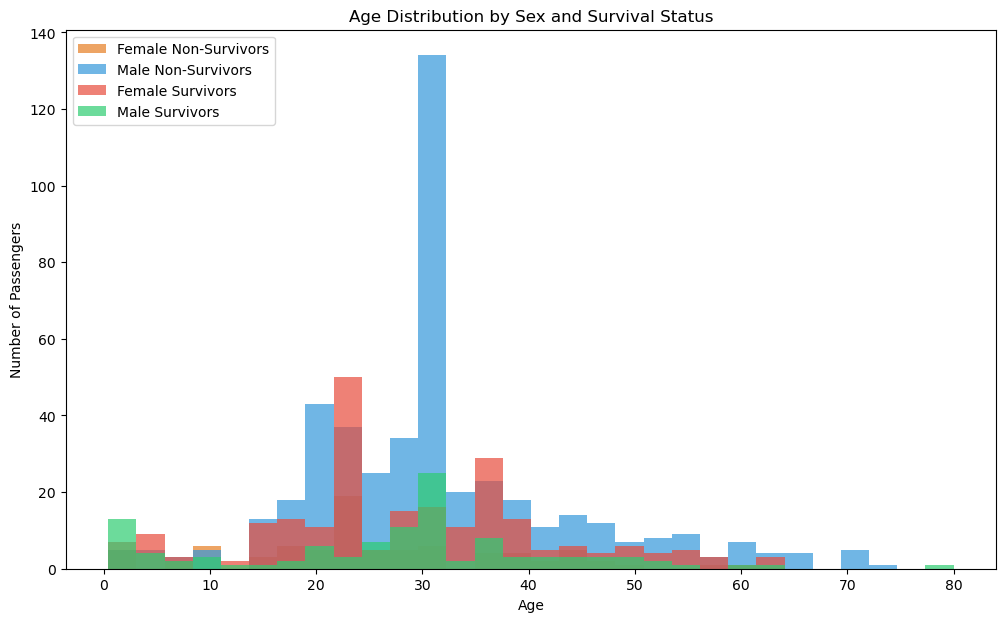

In [7]:

survivors = df[df['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors = df[df['Survived'] == 0][['Age', 'Name', 'Sex']]

plt.figure(figsize=(12, 7), dpi=100)

colors = ['#2ecc71', '#e74c3c', '#3498db', '#e67e22']
alpha = 0.7
bins = 30

plt.hist([
    df[(df['Survived'] == 1) & (df['Sex'] == 1)]['Age'],
    df[(df['Survived'] == 1) & (df['Sex'] == 0)]['Age'],
    df[(df['Survived'] == 0) & (df['Sex'] == 1)]['Age'],
    df[(df['Survived'] == 0) & (df['Sex'] == 0)]['Age']
], 
    bins=bins,
    label=['Male Survivors', 'Female Survivors', 
           'Male Non-Survivors', 'Female Non-Survivors'],
    color=colors,
    alpha=alpha,
    histtype='stepfilled',
)

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution by Sex and Survival Status')

plt.legend(loc='upper left')

plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

/var/folders/tn/77ldw_8x0zjd1x42lpct75vw0000gn/T/ipykernel_24353/2829006014.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
/var/folders/tn/77ldw_8x0zjd1x42lpct75vw0000gn/T/ipykernel_24353/2829006014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inpla

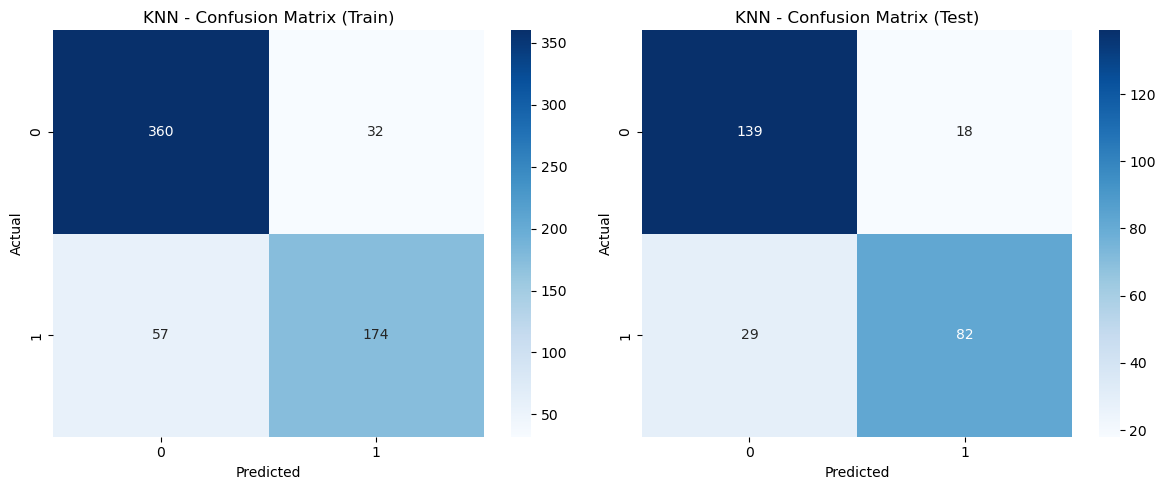

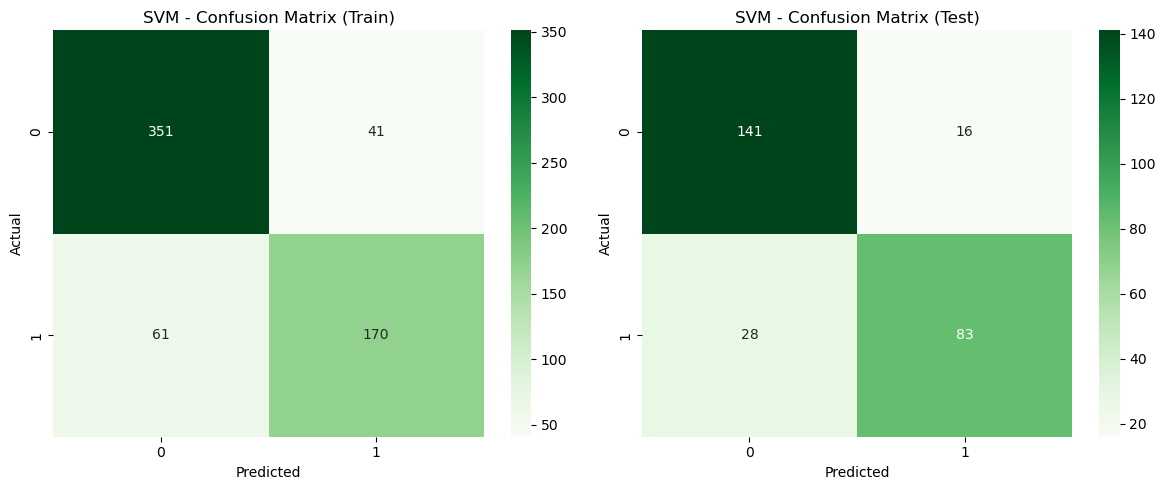

KNN Classification Report (Train):
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       392
           1       0.84      0.75      0.80       231

    accuracy                           0.86       623
   macro avg       0.85      0.84      0.84       623
weighted avg       0.86      0.86      0.86       623


SVM Classification Report (Train):
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       392
           1       0.81      0.74      0.77       231

    accuracy                           0.84       623
   macro avg       0.83      0.82      0.82       623
weighted avg       0.83      0.84      0.83       623


KNN Classification Report (Test):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       157
           1       0.82      0.74      0.78       111

    accuracy                           0.82       268
   macro avg       0.8

In [8]:
'''Your code here'''
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[features]
y = df['Survived']

X['Age'].fillna(X['Age'].median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', C=1, gamma='scale')

knn.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

knn_predictions_train = knn.predict(X_train_scaled)
knn_predictions_test = knn.predict(X_test_scaled)

svm_predictions_train = svm.predict(X_train_scaled)
svm_predictions_test = svm.predict(X_test_scaled)

# KNN confusion matrix for training data
knn_cm_train = confusion_matrix(y_train, knn_predictions_train)
knn_cm_test = confusion_matrix(y_test, knn_predictions_test)

# SVM confusion matrix for training data
svm_cm_train = confusion_matrix(y_train, svm_predictions_train)
svm_cm_test = confusion_matrix(y_test, svm_predictions_test)

# Plot confusion matrices for KNN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(knn_cm_train, annot=True, cmap='Blues', fmt='d')
plt.title('KNN - Confusion Matrix (Train)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(knn_cm_test, annot=True, cmap='Blues', fmt='d')
plt.title('KNN - Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Plot confusion matrices for SVM
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(svm_cm_train, annot=True, cmap='Greens', fmt='d')
plt.title('SVM - Confusion Matrix (Train)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(svm_cm_test, annot=True, cmap='Greens', fmt='d')
plt.title('SVM - Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

print("KNN Classification Report (Train):")
print(classification_report(y_train, knn_predictions_train))

print("\nSVM Classification Report (Train):")
print(classification_report(y_train, svm_predictions_train))

print("\nKNN Classification Report (Test):")
print(classification_report(y_test, knn_predictions_test))

print("\nSVM Classification Report (Test):")
print(classification_report(y_test, svm_predictions_test))

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - The performance on the test data is slightly lower than on the training data for both models. This suggests that the models may be slightly overfitting on the training data but still generalize well to unseen data.

Which models did you fit and which worked better?
 
 - I fit the K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) models. The KNN model had better precision and recall on the test set compared to the SVM, indicating that it performed better overall for this specific dataset.